# #3-1

In [11]:
import cv2 
import numpy as np

angio1 = cv2.imread('./asset_imgs/angio1.jpg',cv2.IMREAD_COLOR)
angio2 = cv2.imread('./asset_imgs/angio2.jpg',cv2.IMREAD_COLOR)

if angio1 is None or angio2 is None:
    raise  Exception("Image File Read Error!")
    

def SubstractImage( image1, image2 ):
    newImage = np.zeros( image1.shape, image1.dtype )
    alpha = 5
    beta = 5
    for y in range( image1.shape[0]):
        for x in range( image1.shape[1]):
            for c in range( image1.shape[2]):
                newImage[y,x,c] = np.clip( alpha*(( int(image2[y,x,c])-int(image1[y,x,c]) )-beta),0, 255)
    return newImage
newImage = SubstractImage( angio1, angio2 )

win_Angio1 = "Angio1"
cv2.namedWindow(win_Angio1)
cv2.moveWindow(win_Angio1, 0, 100 )
cv2.putText(angio1, win_Angio1, (20,50), cv2.FONT_ITALIC,1 ,(0,255,0),2)
cv2.imshow(win_Angio1, angio1)

win_Angio2 = "Angio2"
cv2.namedWindow(win_Angio2)
cv2.moveWindow(win_Angio2, 240, 100 )
cv2.putText(angio2, win_Angio2, (20,50), cv2.FONT_ITALIC,1 ,(0,255,0),2)
cv2.imshow(win_Angio2, angio2)

win_NewImg = "New Image"
cv2.namedWindow(win_NewImg)
cv2.moveWindow(win_NewImg, 480, 100 )
cv2.putText(newImage, win_NewImg, (20,50), cv2.FONT_ITALIC,1 ,(0,255,0),2)
cv2.imshow(win_NewImg, newImage)

cv2.waitKey(0)
cv2.destroyAllWindows()

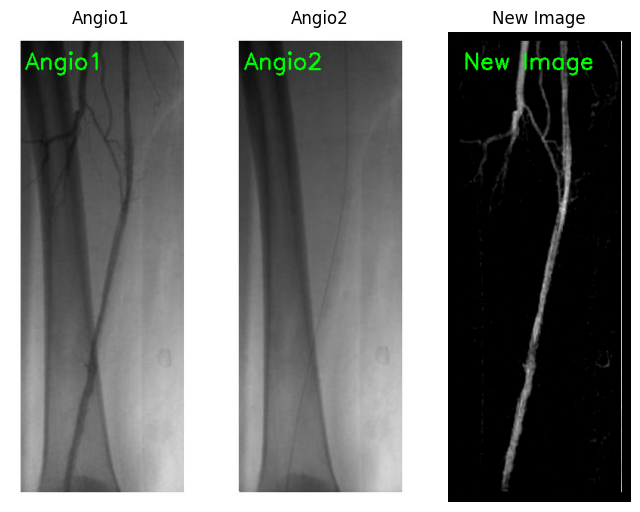

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
plt.subplot(131), plt.imshow(angio1), plt.title('Angio1'),plt.axis('off')
plt.subplot(132), plt.imshow(angio2), plt.title('Angio2'),plt.axis('off')
plt.subplot(133), plt.imshow(newImage), plt.title('New Image'),plt.axis('off')
plt.show()

# #3-2

In [ ]:
import cv2 
import numpy as np

angio1 = cv2.imread('./asset_imgs/angio1.jpg',cv2.IMREAD_GRAYSCALE)#.astype(np.float32) #(624, 242, 3)
angio3 = cv2.imread('./asset_imgs/angio3.jpg',cv2.IMREAD_GRAYSCALE)#.astype(np.float32)

if angio3 is None or angio1 is None:
    raise  Exception("Image File Read Error!")
ssd_window_size = [20,20]
ssd_error_metric = []

for y in range( angio1.shape[0]-ssd_window_size[0]):
    for x in range( angio1.shape[1]-ssd_window_size[1]):
        ssd_error_metric_l = angio3[:ssd_window_size[0],:ssd_window_size[1]].astype(np.float32) - angio1[y:y+ssd_window_size[0],x:x+ssd_window_size[0]].astype(np.float32)
        for i in range(len( ssd_error_metric_l )):
            ssd_error_metric_l[i] = np.power(ssd_error_metric_l[i].astype(np.uint8),2)
        ssd_error_metric.append(np.sum(ssd_error_metric_l))
    
index = ssd_error_metric.index(np.min(ssd_error_metric))
dx = index // (angio1.shape[1]-ssd_window_size[0])
dy = index % (angio1.shape[1]-ssd_window_size[1])

stitchingImage1 = np.zeros( (angio1.shape[0]+dy ,angio1.shape[1]+dx  ), angio1.dtype )
for y in range( angio1.shape[0] ):
    for x in range( angio1.shape[1] ):
        stitchingImage1[y,x] = angio1[y,x]     
stitchingImage2 = np.zeros( (angio1.shape[0]+dy ,angio1.shape[1]+dx  ), angio1.dtype )            
for y in range( angio3.shape[0] ):
    for x in range( angio3.shape[1] ):
        stitchingImage2[y+dy,x+dx] = angio3[y,x]
def SubstractImage( image1, image2 ):
    newImage = np.zeros( image1.shape, image1.dtype )
    alpha = 5
    beta = 5
    for y in range( image1.shape[0]):
        for x in range( image1.shape[1]):
            newImage[y,x] = np.clip( alpha*(( int(image2[y,x])-int(image1[y,x]) )-beta),0, 255)
    return newImage

stitchingImage = SubstractImage(stitchingImage1,stitchingImage2)
win_Angio1 = "Angio1"
cv2.namedWindow(win_Angio1)
cv2.moveWindow(win_Angio1, 0, 100 )
cv2.putText(angio1, win_Angio1, (20,50), cv2.FONT_ITALIC,1 ,(255,255,255),2)
cv2.imshow(win_Angio1, angio1)

win_Angio3 = "Angio3"
cv2.namedWindow(win_Angio3)
cv2.moveWindow(win_Angio3, 240, 100 )
cv2.putText(angio3, win_Angio3, (20,50), cv2.FONT_ITALIC,1 ,(255,255,255),2)
cv2.imshow(win_Angio3, angio3)

win_stitchingImage = "Minimum SSD ["+str(dx)+","+str(dy)+"]"
cv2.namedWindow(win_stitchingImage)
cv2.moveWindow(win_stitchingImage, 0, 700 )
cv2.putText(stitchingImage, win_stitchingImage, (20,50), cv2.FONT_ITALIC,0.5 ,(255,255,255),2)
cv2.imshow(win_stitchingImage, stitchingImage)

cv2.waitKey(0)
cv2.destroyAllWindows()

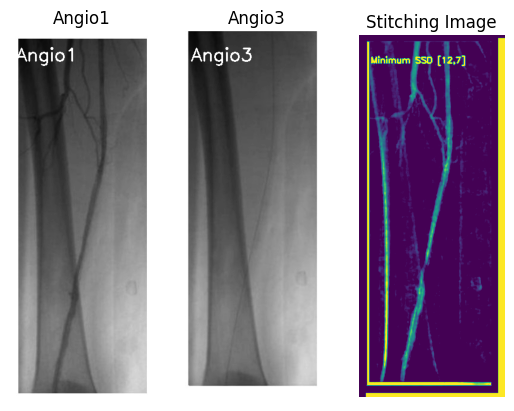

In [16]:
import matplotlib.pyplot as plt
plt.subplot(131), plt.imshow(angio1, cmap="gray"), plt.title('Angio1')
plt.axis('off')
plt.subplot(132), plt.imshow(angio3, cmap="gray"), plt.title('Angio3')
plt.axis('off')
plt.subplot(133), plt.imshow(stitchingImage), plt.title('Stitching Image')
plt.axis('off')
plt.show()

In [20]:
import cv2 
import numpy as np

angio1 = cv2.imread('./asset_imgs/angio1.jpg',cv2.IMREAD_GRAYSCALE)#.astype(np.float32) #(624, 242, 3)
angio3 = cv2.imread('./asset_imgs/angio3.jpg',cv2.IMREAD_GRAYSCALE)#.astype(np.float32)

if angio3 is None or angio1 is None:
    raise  Exception("Image File Read Error!")
stitchingImage1 = np.zeros( (angio1.shape[0]+dy ,angio1.shape[1]+dx  ), angio1.dtype )
stitchingImage2 = np.zeros( (angio1.shape[0]+dy ,angio1.shape[1]+dx  ), angio1.dtype )            
for y in range( angio3.shape[0] ):
    for x in range( angio3.shape[1] ):
        stitchingImage1[y+dy,x+dx] = angio3[y,x]

for y in range( angio1.shape[0]//2 ):
    for x in range( angio1.shape[1]//2 ):
        stitchingImage1[y,x] = angio1[y,x]
                
def SubstractImage( image1, image2 ):
    newImage = np.zeros( image1.shape, image1.dtype )
    alpha = 5
    beta = 5
    for y in range( image1.shape[0]):
        for x in range( image1.shape[1]):
            newImage[y,x] = np.clip( alpha*(-( int(image1[y,x])-int(image2[y,x]) )-beta),0, 255)
    return newImage

stitchingImage = stitchingImage1#SubstractImage(stitchingImage1,stitchingImage2)
win_Angio1 = "Angio1"
cv2.namedWindow(win_Angio1)
cv2.moveWindow(win_Angio1, 0, 100 )
cv2.putText(angio1, win_Angio1, (10,50), cv2.FONT_ITALIC,1 ,(255,255,255),2)
cv2.imshow(win_Angio1, angio1)

win_Angio3 = "Angio3"
cv2.namedWindow(win_Angio3)
cv2.moveWindow(win_Angio3, 240, 100 )
cv2.putText(angio3, win_Angio3, (10,50), cv2.FONT_ITALIC,1 ,(255,255,255),2)
cv2.imshow(win_Angio3, angio3)

win_stitchingImage = "Minimum SSD ["+str(dx)+","+str(dy)+"]"
cv2.namedWindow(win_stitchingImage)
cv2.moveWindow(win_stitchingImage, 0, 700 )
cv2.putText(stitchingImage, win_stitchingImage, (20,50), cv2.FONT_ITALIC,0.5 ,(255,255,255),2)
cv2.imshow(win_stitchingImage, stitchingImage)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Angio3 만들기

True

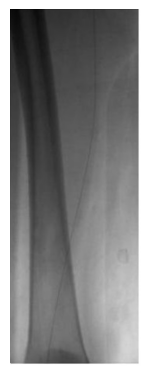

In [61]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

angio3 = cv2.imread('./asset_imgs/angio2.jpg',cv2.IMREAD_COLOR)
if angio3 is None  :
    raise  Exception("Image File Read Error!")

shiftedAngio3 = np.zeros( angio1.shape, angio1.dtype )

for y in range( angio1.shape[0]):
    for x in range( angio1.shape[1]):
        for c in range( angio1.shape[2]):
            if angio1.shape[0]-23 > y and angio1.shape[1]-23 > x:
                shiftedAngio3[y,x,c] = angio3[y+13,x+13,c]
            else:
                shiftedAngio3[y,x,c] = 255

plt.imshow(shiftedAngio3)
cv2.imwrite("./asset_imgs/angio3.jpg",  shiftedAngio3)